In [1]:
from glob import glob
import pandas as pd
import yaml
import numpy as np
import pickle

method = "nuance"
files = glob(f"../data/results/{method}/*.pkl")
# idxs = sorted([int(f.split("/")[-1].split(".")[0]) for f in files])
idxs = np.arange(4000)
params = {i: yaml.full_load(open(f"../data/params/{i}.yaml", "r")) for i in idxs}


def is_found(period, true_period):
    period_check = np.abs(period - true_period) < 0.01
    alias_check = np.abs(2 * period - true_period) < 0.01
    alias_check |= np.abs(period / 2 - true_period) < 0.01
    if period_check:
        return 1
    elif alias_check:
        return 1
    else:
        return 0


df = pd.DataFrame(
    [
        {
            **pickle.load(open(f"../data/results/{method}/{i}.pkl", "rb")),
            "tau": params[i]["tau"],
            "delta": params[i]["delta"],
        }
        for i in idxs
    ]
)
df["found"] = df.apply(lambda row: is_found(row["period"], 1.1), axis=1)

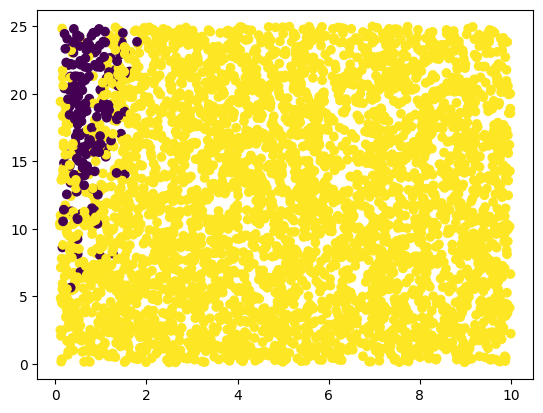

In [183]:
plt.scatter(df["tau"], df["delta"], c=df["found"])

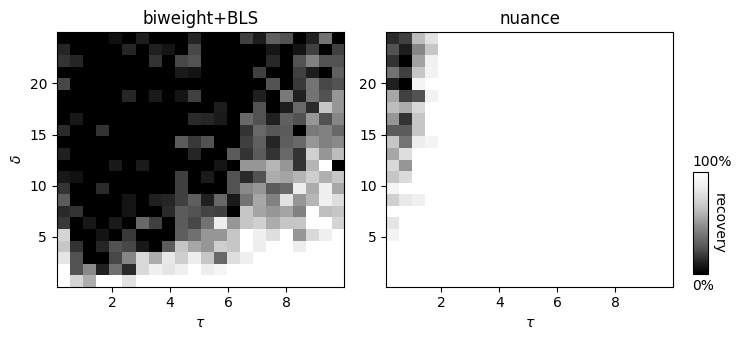

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d

df = pd.read_csv("../data/results.csv")

df["bls_found"] = df.apply(
    lambda row: is_found(row["bls_period"], row["period"]), axis=1
)
df["nuance_found"] = df.apply(
    lambda row: is_found(row["nuance_period"], row["period"]), axis=1
)

bins = (22, 22)
fig = plt.figure(None, (7.5, 3.5))
cmap="Greys_r"

ax = plt.subplot(121)
bins = (22, 22)
tau, delta, found = df[["tau", "delta", "bls_found"]].values.T
stats = binned_statistic_2d(tau, delta, found, bins=bins)
im = plt.imshow(
    stats.statistic.T,
    origin="lower",
    extent=(
        stats.x_edge.min(),
        stats.x_edge.max(),
        stats.y_edge.min(),
        stats.y_edge.max(),
    ),
    aspect="auto",
    cmap=cmap,
)
ax.set_xlabel(r"$\tau$")
ax.set_ylabel(r"$\delta$")
ax.set_title("biweight+BLS")

ax = plt.subplot(122)
bins = (22, 22)
tau, delta, found = df[["tau", "delta", "nuance_found"]].values.T
stats = binned_statistic_2d(tau, delta, found, bins=bins)
im = plt.imshow(
    stats.statistic.T,
    origin="lower",
    extent=(
        stats.x_edge.min(),
        stats.x_edge.max(),
        stats.y_edge.min(),
        stats.y_edge.max(),
    ),
    aspect="auto",
    cmap=cmap,
)
ax.set_xlabel(r"$\tau$")
ax.set_title("nuance")
axins = ax.inset_axes((1.07, 0.05, 0.05, 0.4))
cb = fig.colorbar(im, cax=axins, orientation="vertical", ticks=[])
cb.ax.text(-0.1, -0.12, "0%", va="center", ha="left")
cb.ax.text(-0.1, 1.1, "100%", va="center", ha="left")
cb.ax.text(1.3, 0.5, "recovery", va="center", ha="left", rotation=-90)

plt.tight_layout()



CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.62 µs


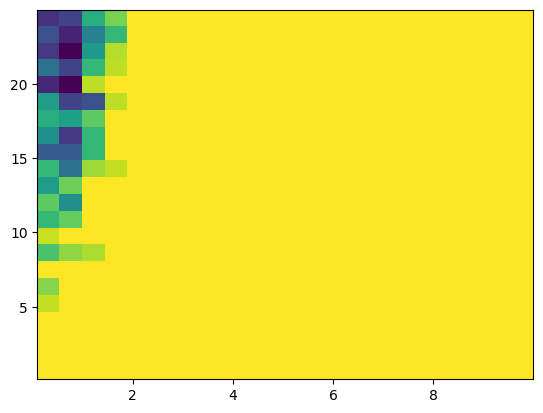

In [184]:
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d

tau, delta, found = df[["tau", "delta", "found"]].values.T
bins = (22, 22)
stats = binned_statistic_2d(tau, delta, found, bins=bins)
im = plt.imshow(
    stats.statistic.T,
    origin="lower",
    extent=(
        stats.x_edge.min(),
        stats.x_edge.max(),
        stats.y_edge.min(),
        stats.y_edge.max(),
    ),
    aspect="auto",
    # cmap="Greys_r"
)

<ErrorbarContainer object of 3 artists>

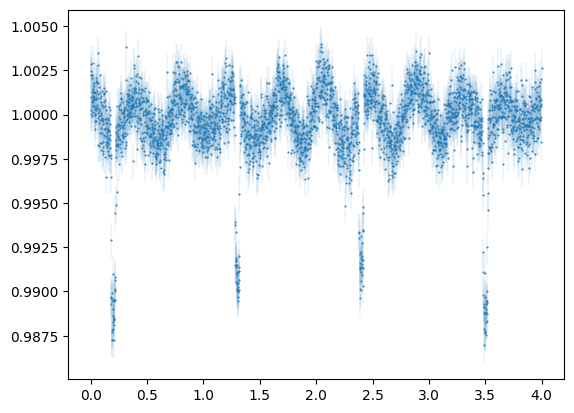

In [57]:
time, flux, error = np.load("../data/lightcurves/9.npy")
plt.figure()
plt.errorbar(time, flux, error, fmt=".", ms=1, elinewidth=0.1)

In [58]:
len(time)

2880

In [59]:
4 / (2/60/24)

2880.0

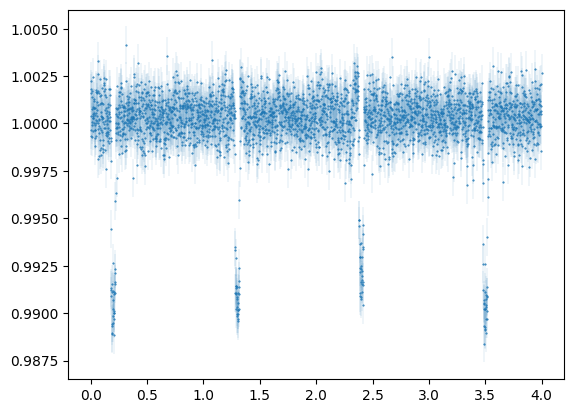

In [81]:
from wotan import flatten
from astropy.timeseries import BoxLeastSquares

time, flux, error = np.load("../data/lightcurves/9.npy")

flatten_trend = flatten(time, flux, window_length=0.04 * 3, return_trend=True)[1]
flatten_flux = flux - flatten_trend
flatten_flux -= np.mean(flatten_flux)
flatten_flux += 1.0

plt.figure()
plt.errorbar(time, flatten_flux, error, fmt=".", ms=1, elinewidth=0.1)

periods = np.linspace(0.8, 3, 1000)
model = BoxLeastSquares(time, flatten_flux, dy=error)
results = model.power(periods, 0.04)

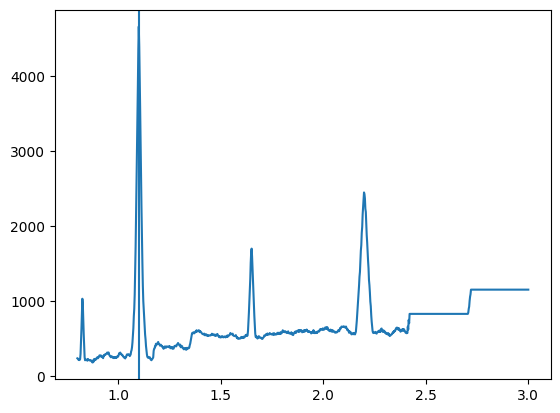

In [82]:
plt.axvline(1.1)
plt.plot(results.period, results.power)

In [80]:
results.period

array([0.8       , 0.8022022 , 0.8044044 , 0.80660661, 0.80880881,
       0.81101101, 0.81321321, 0.81541542, 0.81761762, 0.81981982,
       0.82202202, 0.82422422, 0.82642643, 0.82862863, 0.83083083,
       0.83303303, 0.83523524, 0.83743744, 0.83963964, 0.84184184,
       0.84404404, 0.84624625, 0.84844845, 0.85065065, 0.85285285,
       0.85505506, 0.85725726, 0.85945946, 0.86166166, 0.86386386,
       0.86606607, 0.86826827, 0.87047047, 0.87267267, 0.87487487,
       0.87707708, 0.87927928, 0.88148148, 0.88368368, 0.88588589,
       0.88808809, 0.89029029, 0.89249249, 0.89469469, 0.8968969 ,
       0.8990991 , 0.9013013 , 0.9035035 , 0.90570571, 0.90790791,
       0.91011011, 0.91231231, 0.91451451, 0.91671672, 0.91891892,
       0.92112112, 0.92332332, 0.92552553, 0.92772773, 0.92992993,
       0.93213213, 0.93433433, 0.93653654, 0.93873874, 0.94094094,
       0.94314314, 0.94534535, 0.94754755, 0.94974975, 0.95195195,
       0.95415415, 0.95635636, 0.95855856, 0.96076076, 0.96296

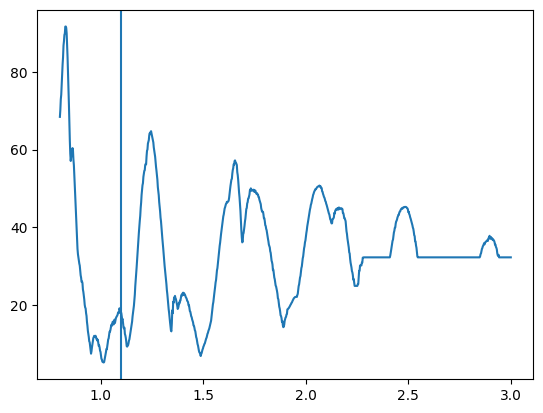

In [71]:
periods = np.linspace(0.8, 3, 1000)
plt.plot(
    periods, pickle.load(open("../data/results/biweight_bls/9.pkl", "rb"))["power"]
)
plt.axvline(1.1)